# Krishi Mitra

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
# reading the csv file
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2004,96,41,40,23.584193,72.004608,6.090060,190.424216,jute
1819,31,6,26,29.128591,91.309248,5.741367,157.238855,coconut
1344,103,16,49,24.067315,81.640753,6.915717,51.752124,watermelon
1872,27,30,31,28.985453,90.739668,5.718120,148.839837,coconut
1762,63,58,47,26.830541,90.753800,6.864144,144.665644,papaya
1427,104,25,55,29.811966,90.368813,6.123803,22.687665,muskmelon
1324,83,29,52,25.764027,87.593113,6.704689,46.051227,watermelon
533,7,56,23,26.339088,40.009334,5.545219,55.504292,mothbeans
1913,102,49,21,24.693155,84.844225,6.253344,89.799462,cotton
307,26,80,18,19.325096,23.333479,5.581022,104.778395,kidneybeans


In [5]:
## check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
## check missing Values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## Observation
There are no missing values

In [7]:
## Check Duplicates
df.duplicated().sum()

0

## Observation
There are no duplicates values in the dataset

In [8]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
## Check the statistics of the dataset
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Observation
We can see there in column N(Nitrogen) the minimum value is 0. That's not possible. We can simply replace it with the respected mean values.

In [10]:
# Replacing the 0 value of 'N' column with the mean value
df["N"] = df["N"].replace(0, df["N"].mean())

In [11]:
## All the colums of the dataset
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

## Conclusion
It is a balanced Dataset

# Data Visualisation

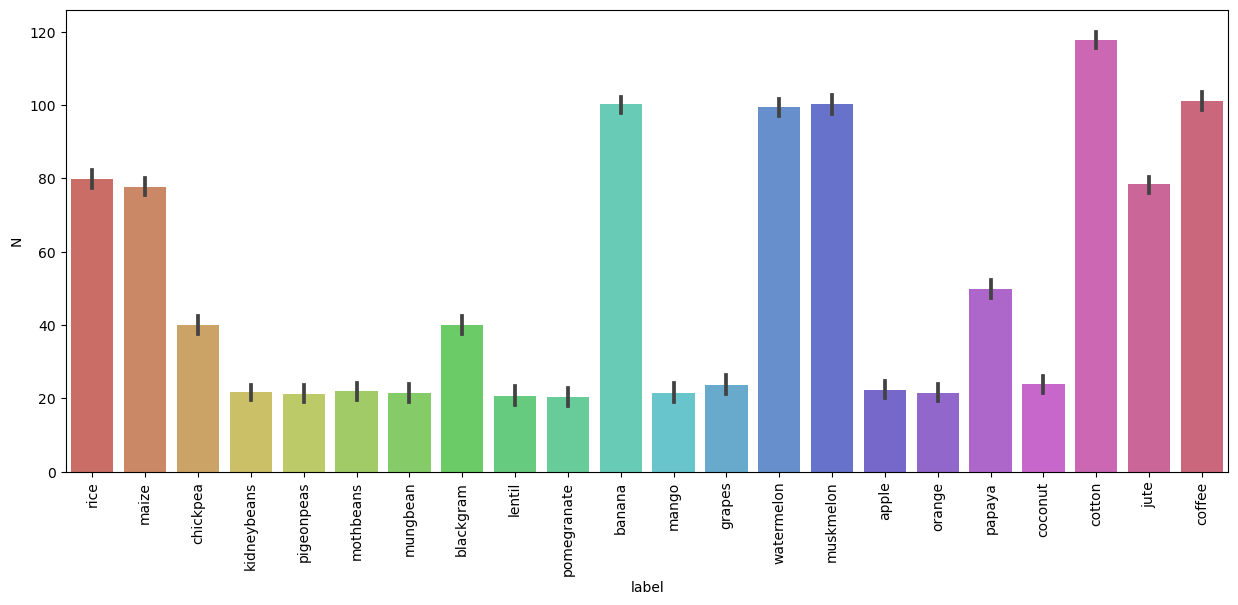

In [13]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'N', x = 'label', data=df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

## Insights
Cotton needs highest Nitrogen to grow among all these crops

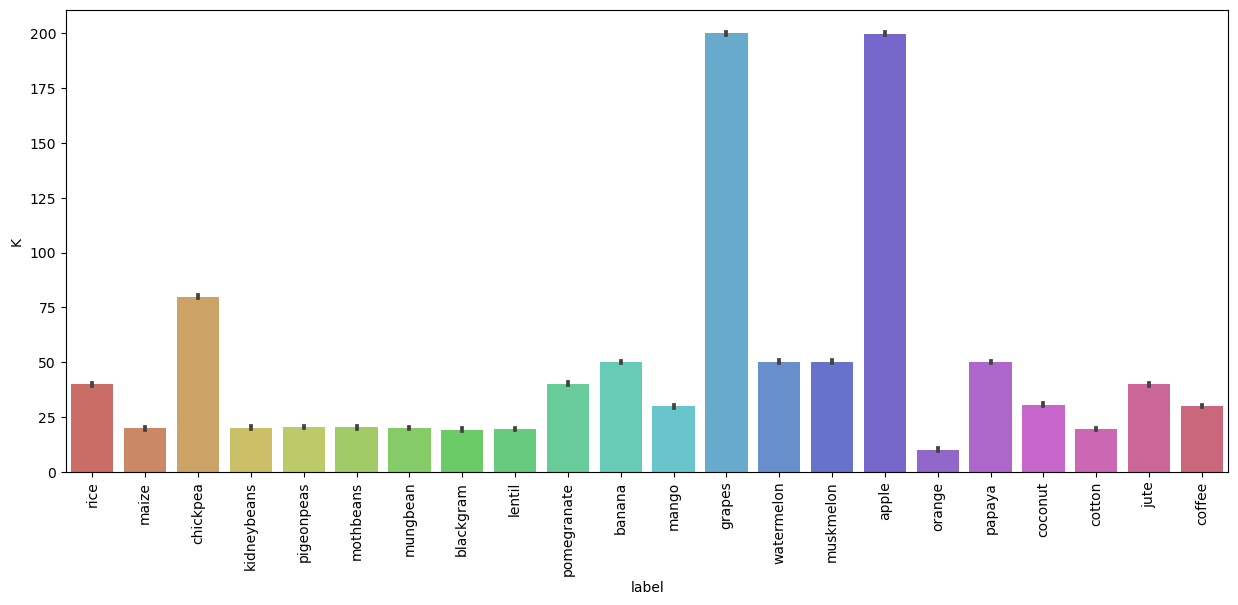

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'K', x = 'label', data=df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

## Insights
Grapes and Apple needs highest potassium to grow among all these crops

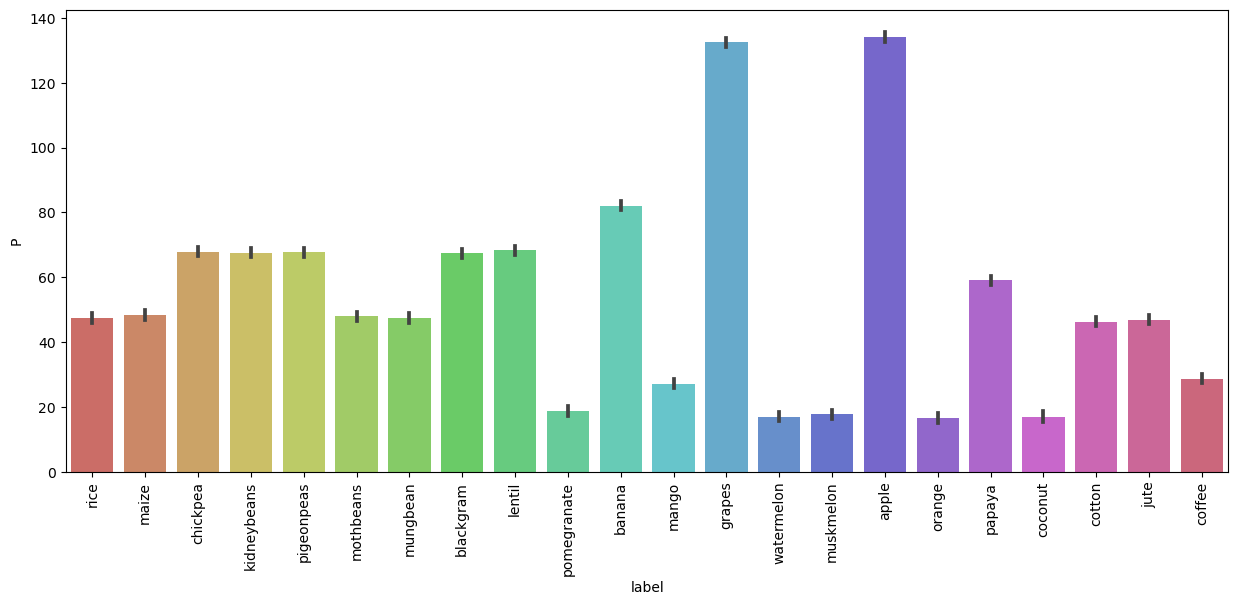

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'P', x = 'label', data=df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

## Insights
Grapes and Apple needs highest phosphorus to grow among all these crops

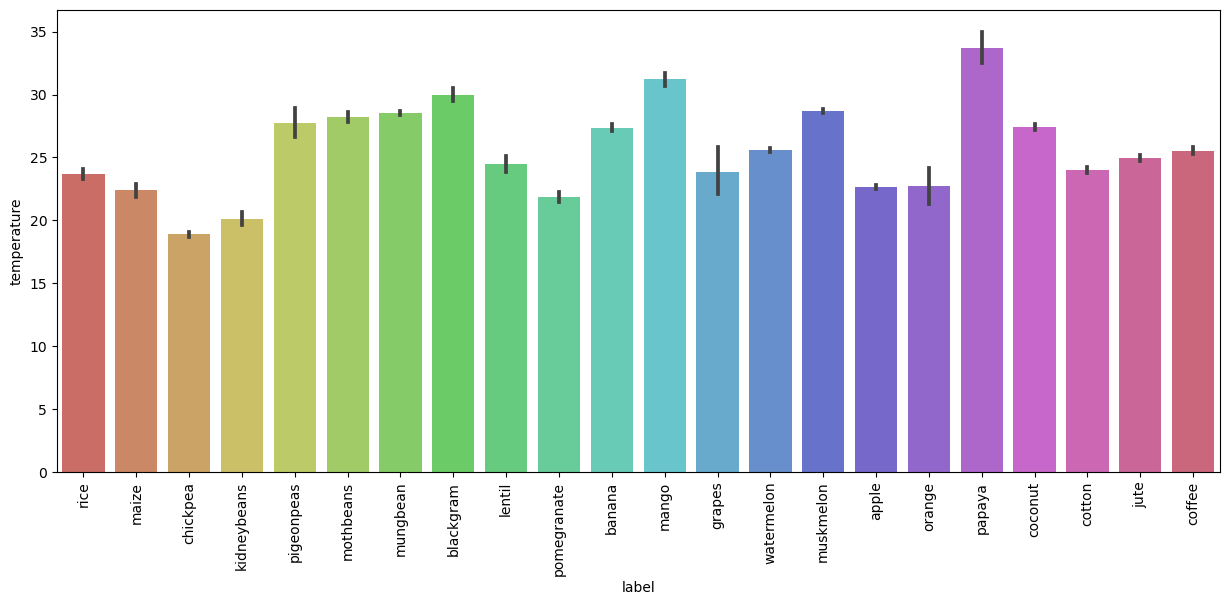

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'temperature', x = 'label', data=df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

# Insights
Papaya needs highest temperature to grow among all these crops

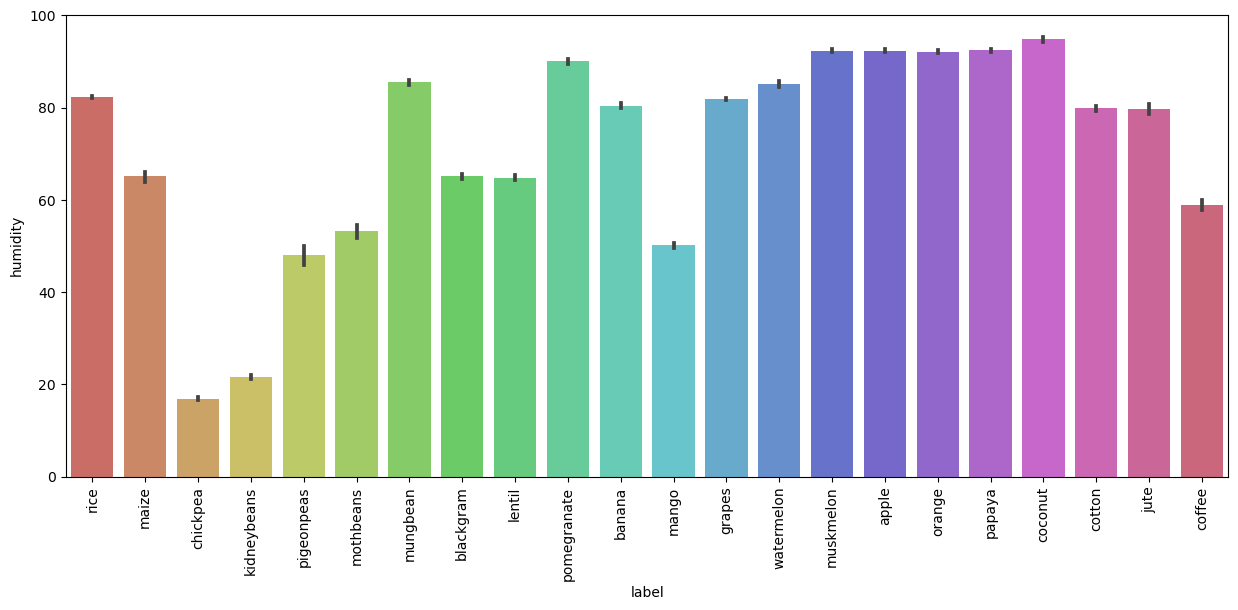

In [17]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'humidity', x = 'label', data=df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

# Insights
Coconut needs highest humidity to grow then Papaya, orange, apple, muskmelon among all these crops.

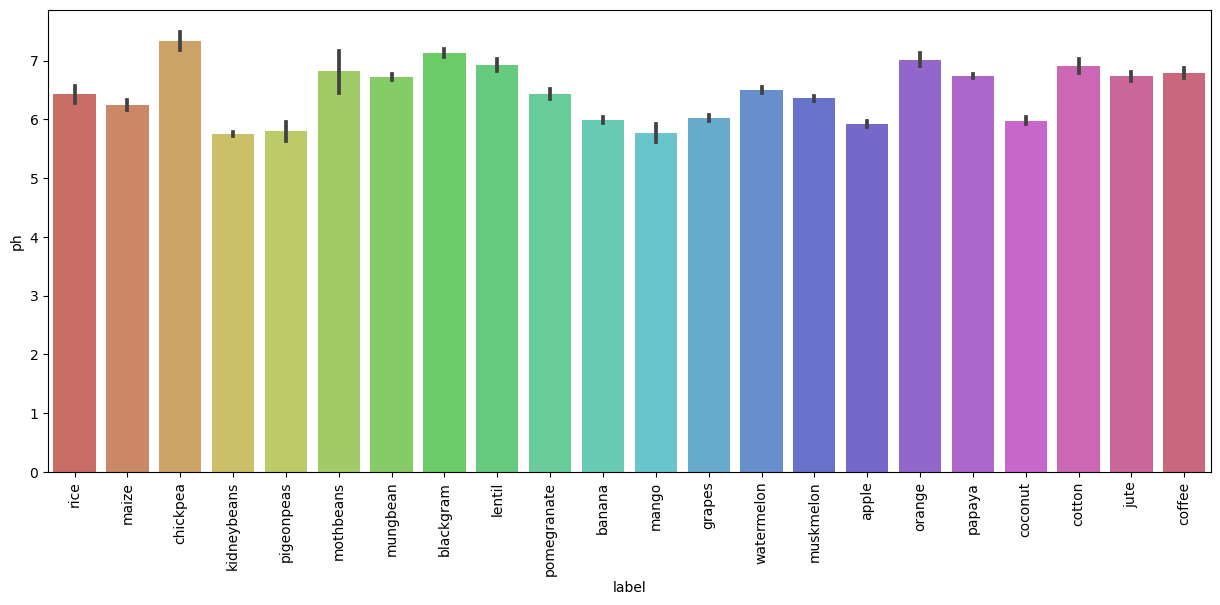

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'ph', x = 'label', data=df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

# Insights
chickpea needs highest ph to grow among all these crops

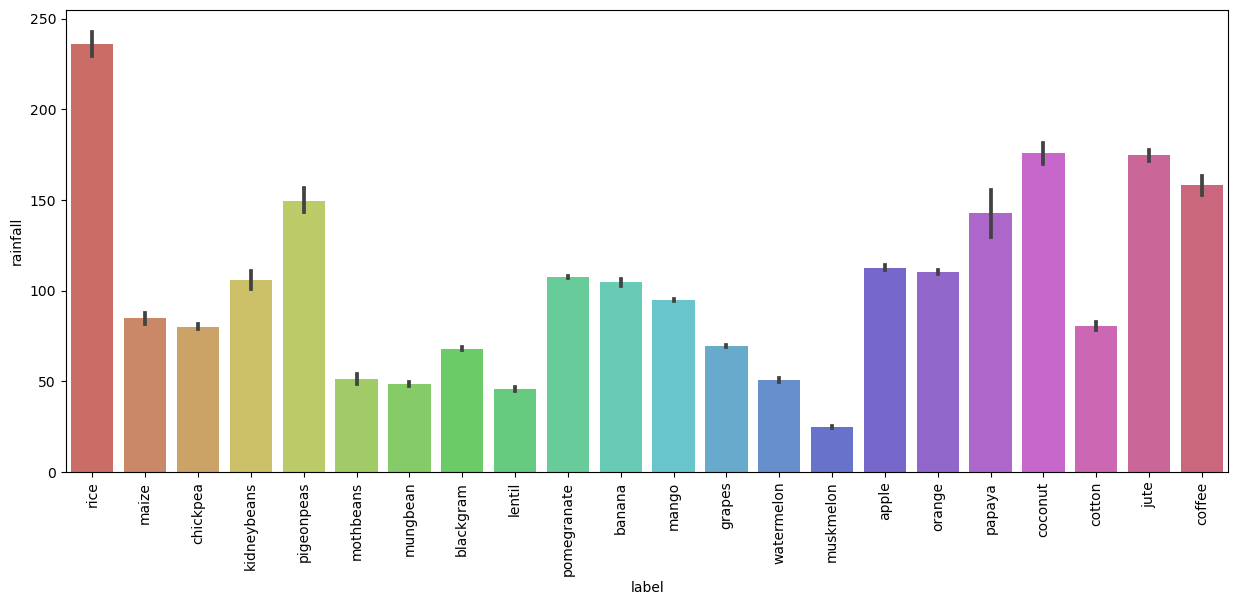

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'rainfall', x = 'label', data=df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

# Insights
rice needs highest rainfall to grow among all these crops

<Axes: >

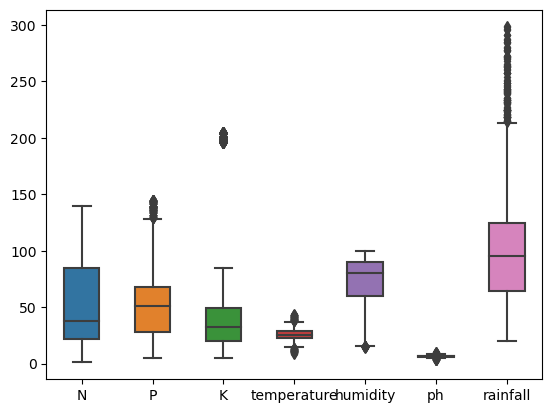

In [20]:
# Checking for Outliers
sns.boxplot(data=df, width=0.5)

<Axes: ylabel='label'>

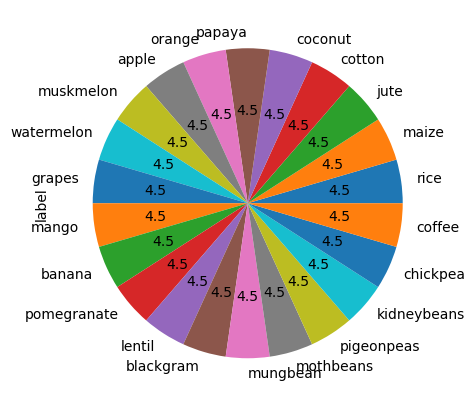

In [21]:
df['label'].value_counts().plot.pie(y=df['label'],figsize=(5,6),autopct='%1.1f')

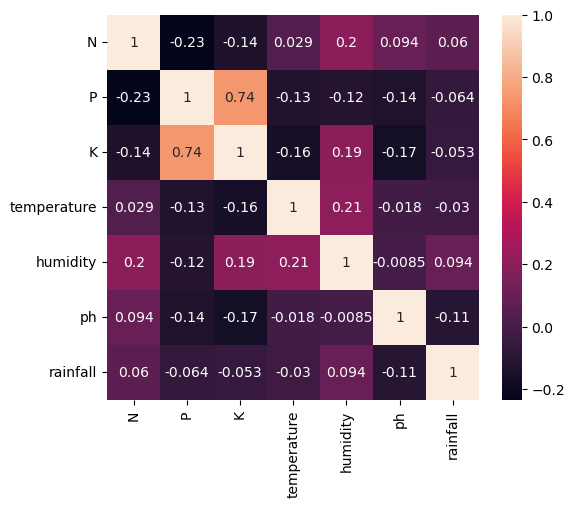

In [22]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot= True)
plt.show()

## Insights
we have a mild correlation except for Phosphorus and Potassium so both of these nutrients are necessary for plants to grow.

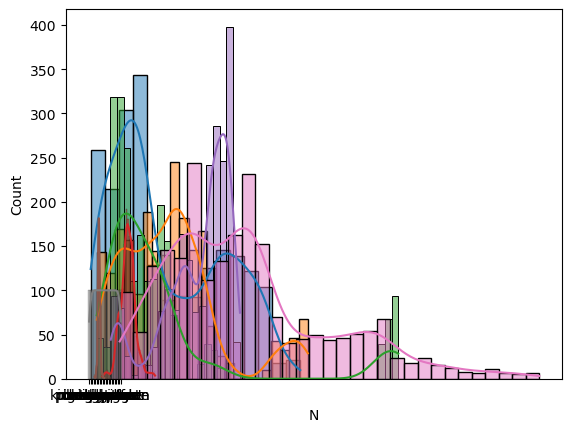

In [23]:
for column in df.columns:
    sns.histplot(df[column], kde=True)

<Axes: xlabel='humidity', ylabel='Density'>

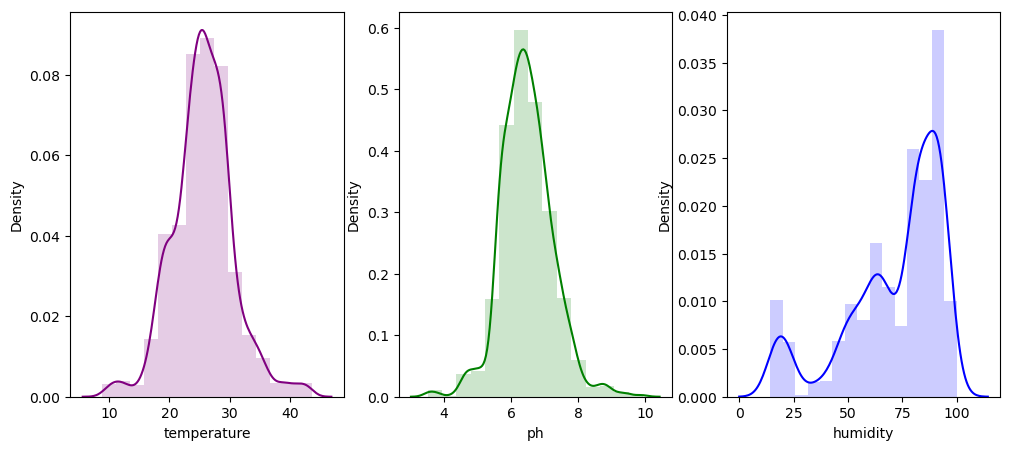

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(1, 3, 1)
sns.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 3, 2)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 3, 3)
sns.distplot(df['humidity'],color="blue",bins=15,hist_kws={'alpha':0.2})

## Insights
Temperature and pH have a normal distribution.

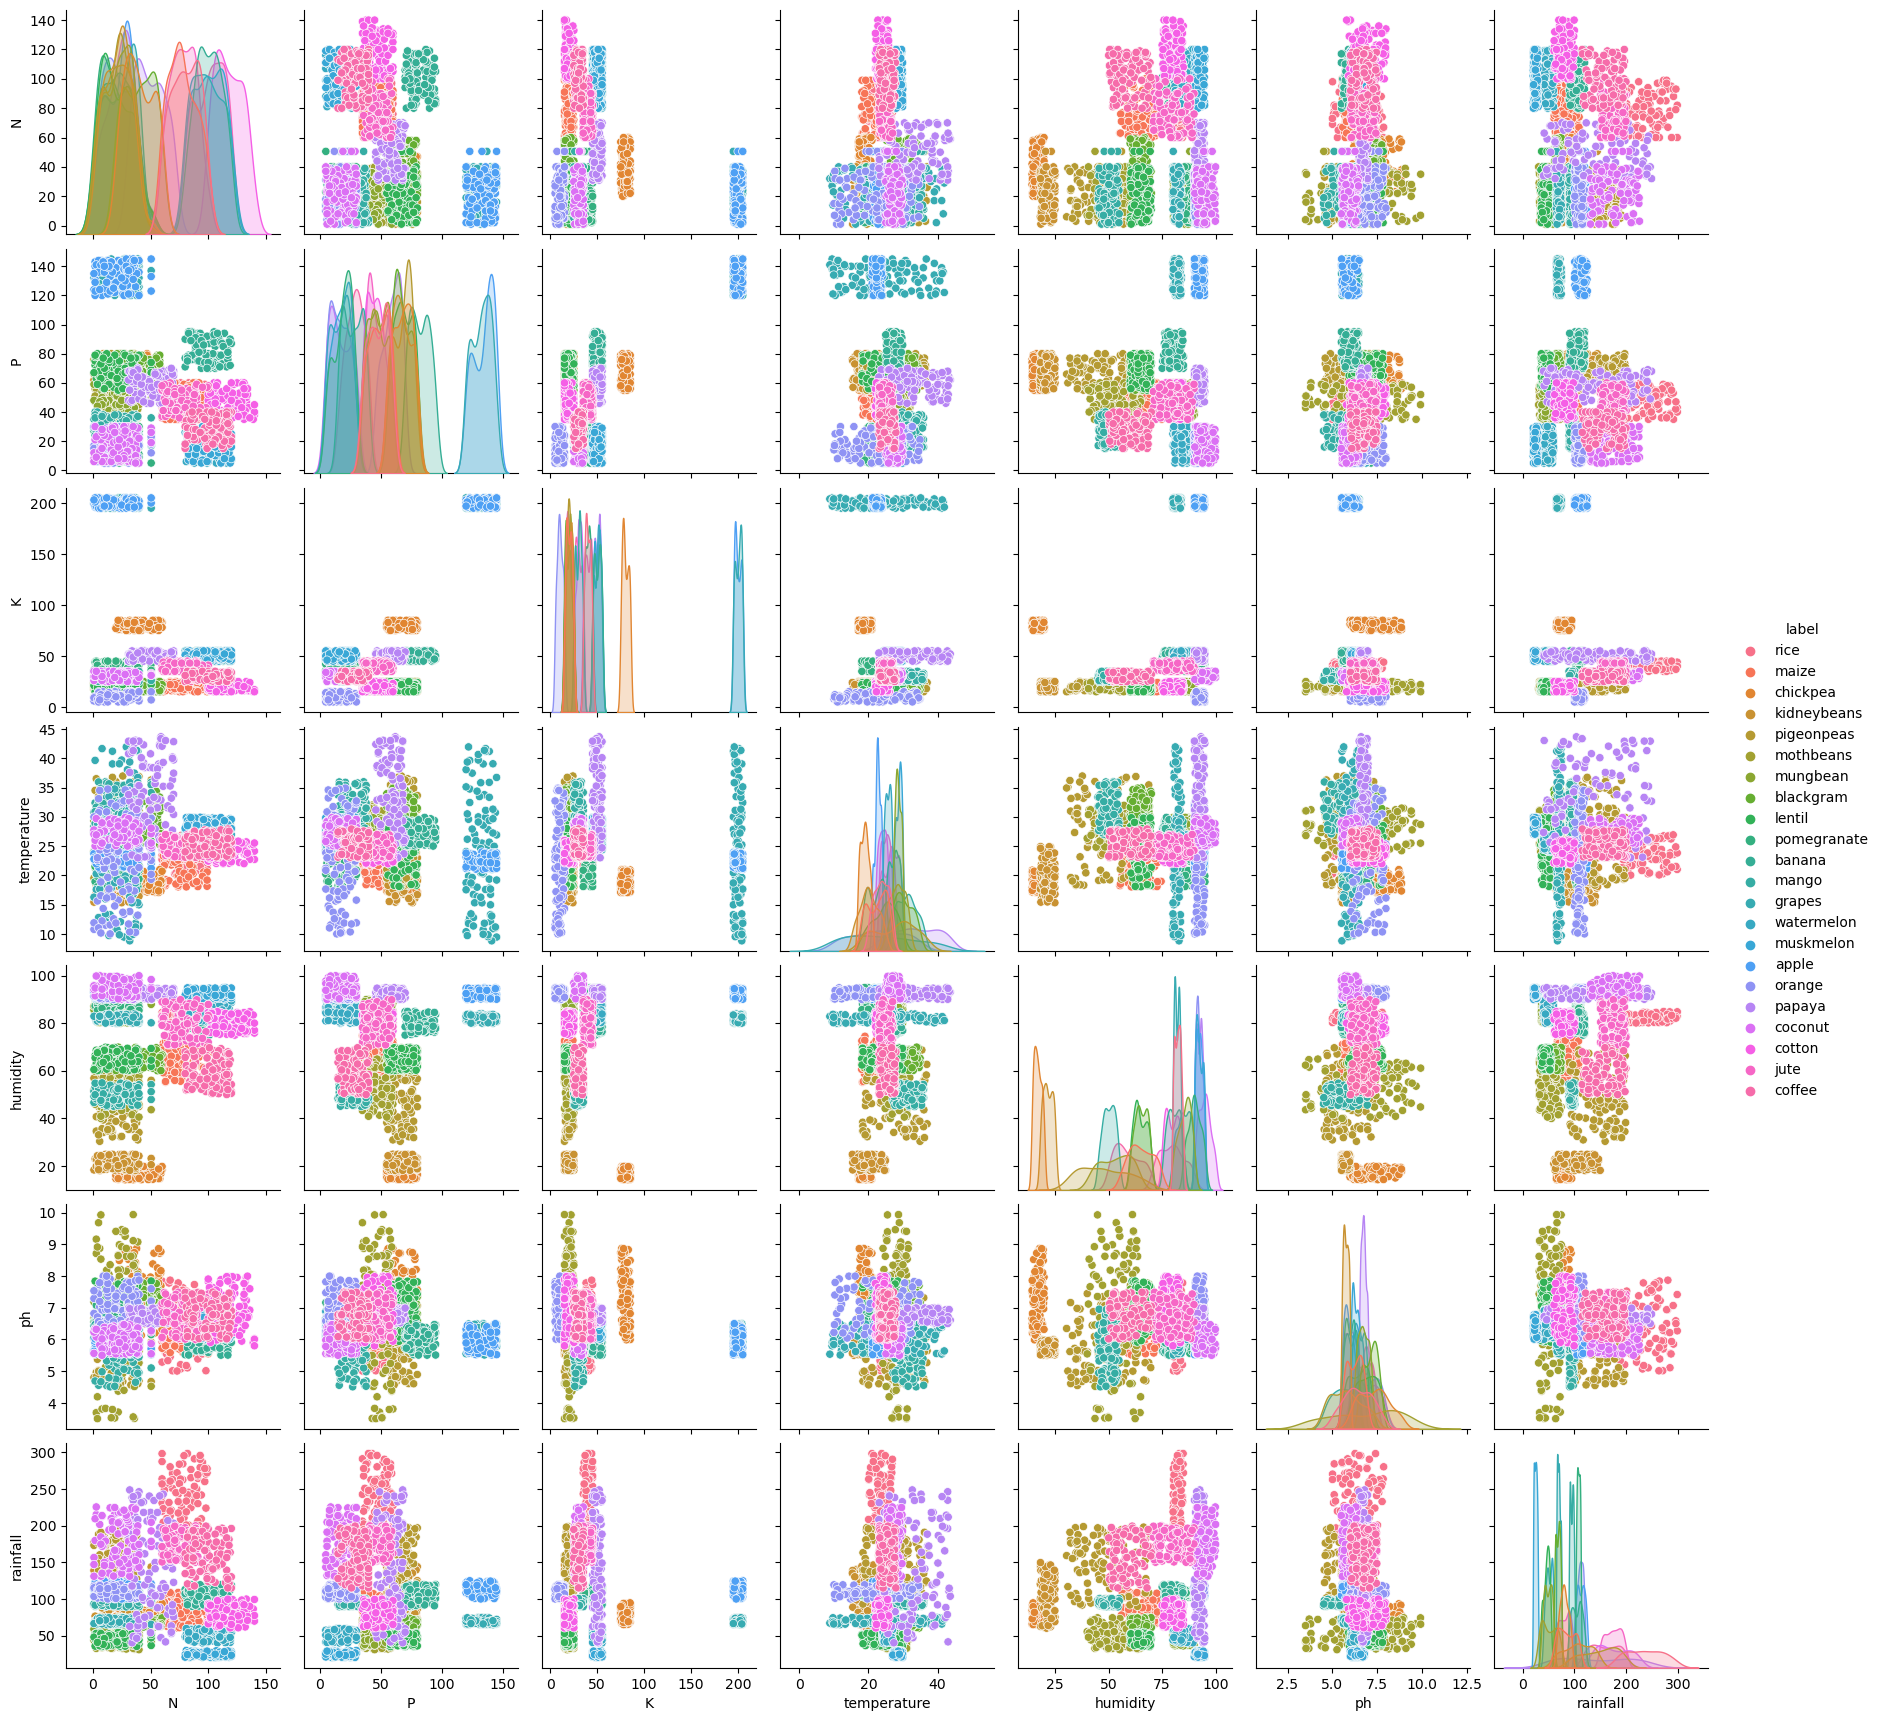

In [25]:
sns.pairplot(df, hue='label')

# Spliting the dataset into train and test

In [26]:
## Independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature Engineering

In [28]:
df["label"] = df["label"].map({'rice':1,'maize':2, 'chickpea':3, 'kidneybeans':4, 'pigeonpeas':5,
       'mothbeans':6, 'mungbean':7, 'blackgram':8, 'lentil':9, 'pomegranate':10,
       'banana':11, 'mango':12, 'grapes':13, 'watermelon':14, 'muskmelon':15, 'apple':16,
       'orange':17, 'papaya':18, 'coconut':19, 'cotton':20, 'jute':21, 'coffee':22})

In [29]:
# standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = open('standardScalar.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [30]:
X_train, X_test = scaler_standard(X_train, X_test)

# Machine Learning

In [31]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Support Vector Classification" : SVC(),
    'Random Forest Classification':RandomForestClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)   # Train model
    
    # make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performence
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred, average="weighted")
    model_train_recall = recall_score(y_train, y_train_pred, average="weighted")
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    # Testing set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred, average="weighted")
    model_test_recall = recall_score(y_test, y_test_pred, average="weighted")
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print
    print(list(models.keys())[i])
    
    print("Model performance for Training set")
    print("-- Accuracy: {:.2f}".format(model_train_accuracy*100))
    print("-- Precision: {:.2f}".format(model_train_precision))
    print("-- Recall: {:.2f}".format(model_train_recall))
    print("-- F1 Score: {:.2f}".format(model_train_f1))
    
    print()
    print("Model performance for Testing set")
    print("-- Accuracy: {:.2f}".format(model_test_accuracy*100))
    print("-- Precision: {:.2f}".format(model_test_precision))
    print("-- Recall: {:.2f}".format(model_test_recall))
    print("-- F1 Score: {:.2f}".format(model_test_f1))
    print("----------------------------------------")

Logistic Regression
Model performance for Training set
-- Accuracy: 97.69
-- Precision: 0.98
-- Recall: 0.98
-- F1 Score: 0.98

Model performance for Testing set
-- Accuracy: 96.01
-- Precision: 0.96
-- Recall: 0.96
-- F1 Score: 0.96
----------------------------------------
Decision Tree
Model performance for Training set
-- Accuracy: 100.00
-- Precision: 1.00
-- Recall: 1.00
-- F1 Score: 1.00

Model performance for Testing set
-- Accuracy: 97.25
-- Precision: 0.97
-- Recall: 0.97
-- F1 Score: 0.97
----------------------------------------
Support Vector Classification
Model performance for Training set
-- Accuracy: 98.85
-- Precision: 0.99
-- Recall: 0.99
-- F1 Score: 0.99

Model performance for Testing set
-- Accuracy: 97.11
-- Precision: 0.98
-- Recall: 0.97
-- F1 Score: 0.97
----------------------------------------
Random Forest Classification
Model performance for Training set
-- Accuracy: 100.00
-- Precision: 1.00
-- Recall: 1.00
-- F1 Score: 1.00

Model performance for Testing se

In [36]:
params={'max_depth':[3,5,10,None],
        'n_estimators':[100,200,300],
        'criterion':['gini','entropy']
}
classifier = RandomForestClassifier()

In [37]:
cv=RandomizedSearchCV(classifier,param_distributions=params,scoring='accuracy',cv=2,verbose=3)
cv.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.924 total time=   0.3s
[CV 2/2] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.924 total time=   0.3s
[CV 1/2] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.986 total time=   0.5s
[CV 2/2] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.996 total time=   0.5s
[CV 1/2] END criterion=gini, max_depth=10, n_estimators=100;, score=0.988 total time=   0.1s
[CV 2/2] END criterion=gini, max_depth=10, n_estimators=100;, score=0.997 total time=   0.1s
[CV 1/2] END criterion=gini, max_depth=5, n_estimators=300;, score=0.972 total time=   0.3s
[CV 2/2] END criterion=gini, max_depth=5, n_estimators=300;, score=0.980 total time=   0.3s
[CV 1/2] END criterion=gini, max_depth=3, n_estimators=200;, score=0.901 total time=   0.2s
[CV 2/2] END criterion=gini, max_depth=3, n_estimators=200;, score=0.886 total time=   0.2s
[CV

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [38]:
y_train_pred = cv.predict(X_train)
y_test_pred = cv.predict(X_test)
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_test_accuracy = accuracy_score(y_test, y_test_pred)

In [39]:
print("-- Accuracy for Training Data: {:.2f}".format(model_train_accuracy*100))
print("-- Accuracy for test data: {:.2f}".format(model_test_accuracy*100))

-- Accuracy for Training Data: 99.86
-- Accuracy for test data: 99.31


In [40]:
file = open('ModelForTesting.pkl','wb')
pickle.dump(cv,file)
file.close()